In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/real estate.csv')

# from google.colab import files
# uploaded = files.upload()

# df = pd.read_csv(list(uploaded.keys())[0])

print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (14177, 22)
Columns: ['property_id', 'address', 'neighbourhood', 'ward', 'assessed_value', 'garage', 'latitude', 'longitude', 'lot_size_sf', 'total_living_area_sf', 'year_built', 'land_value', 'improvement_value', 'bedrooms', 'bathrooms', 'basement', 'property_type', 'property_use', 'building_age', 'price_per_sqft', 'land_to_building_ratio', 'annual_tax']

First few rows:


,property_id,address,neighbourhood,ward,assessed_value,garage,latitude,longitude,lot_size_sf,total_living_area_sf,...,improvement_value,bedrooms,bathrooms,basement,property_type,property_use,building_age,price_per_sqft,land_to_building_ratio,annual_tax
0,10000000,"18230 107A STREET NW Edmonton, AB",CHAMBERY,tastawiyiniwak Ward,428500,Y,53.644496,-113.510582,395.758,137.0,...,278525,4,2.0,Finished,Duplex,Rental Property,22,3127.737226,2.888745,5142
1,10000001,"18234 107A STREET NW Edmonton, AB",CHAMBERY,tastawiyiniwak Ward,438500,Y,53.644589,-113.510570,364.863,136.9,...,285025,4,2.0,NaN,Single Family Home,Residential,22,3203.067933,2.665179,5262
2,10000002,"18238 107A STREET NW Edmonton, AB",CHAMBERY,tastawiyiniwak Ward,439000,Y,53.644682,-113.510559,364.866,151.4,...,285350,4,2.0,Finished,Row Housing,Investment Property,22,2899.603699,2.409947,5268
3,10000003,"18242 107A STREET NW Edmonton, AB",CHAMBERY,tastawiyiniwak Ward,440000,Y,53.644785,-113.510550,424.504,136.8,...,286000,4,2.0,Unfinished,Single Family Home,Residential,22,3216.374269,3.103099,5280
4,10000004,"18203 107 STREET NW Edmonton, AB",CHAMBERY,tastawiyiniwak Ward,487500,Y,53.644628,-113.508435,551.298,133.3,...,316875,4,2.5,Partially Finished,Single Family Home,Rental Property,22,3657.164291,4.135769,5850


In [3]:
import numpy as np
def analyze_dataset_structure(df):
    """Comprehensive dataset structure analysis"""
    # Basic info
    print(f"Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
    print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

    # Data types
    print(f"\nDATA TYPES:")
    dtype_counts = df.dtypes.value_counts()
    for dtype, count in dtype_counts.items():
        print(f"   {dtype}: {count} columns")

    # Column categories
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

    print(f"\nNUMERIC COLUMNS ({len(numeric_cols)}):")
    for col in numeric_cols:
        print(f"   • {col}")

    print(f"\nCATEGORICAL COLUMNS ({len(categorical_cols)}):")
    for col in categorical_cols:
        print(f"   • {col}")

    return numeric_cols, categorical_cols

numeric_columns, categorical_columns = analyze_dataset_structure(df)

Dataset Shape: 14,177 rows × 22 columns
Memory Usage: 8.31 MB

DATA TYPES:
   int64: 8 columns
   object: 7 columns
   float64: 7 columns

NUMERIC COLUMNS (15):
   • property_id
   • assessed_value
   • latitude
   • longitude
   • lot_size_sf
   • total_living_area_sf
   • year_built
   • land_value
   • improvement_value
   • bedrooms
   • bathrooms
   • building_age
   • price_per_sqft
   • land_to_building_ratio
   • annual_tax

CATEGORICAL COLUMNS (7):
   • address
   • neighbourhood
   • ward
   • garage
   • basement
   • property_type
   • property_use


In [4]:
def comprehensive_data_quality_check(df):
    """Perform comprehensive data quality analysis"""

    # Missing values analysis
    print("MISSING VALUES ANALYSIS:")
    missing_data = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (missing_data / len(df) * 100).round(2)

    missing_df = pd.DataFrame({
        'Missing Count': missing_data,
        'Missing Percentage': missing_percent
    })

    # Only show columns with missing values
    missing_df = missing_df[missing_df['Missing Count'] > 0]

    if len(missing_df) > 0:
        print(missing_df)
    else:
        print("No missing values found!")

    # Duplicate analysis
    duplicates = df.duplicated()
    print(f"\nDUPLICATE ANALYSIS:")
    print(f"   Total duplicated rows: {duplicates.sum():,}")
    print(f"   Percentage of duplicates: {(duplicates.sum() / len(df) * 100):.2f}%")

    # Unique values in categorical columns
    print(f"\nCATEGORICAL COLUMNS UNIQUE VALUES:")
    for col in categorical_columns:
        unique_count = df[col].nunique()
        total_count = len(df[col])
        print(f"   {col}: {unique_count:,} unique values ({unique_count/total_count*100:.1f}% unique)")

    # Zero values in numeric columns
    print(f"\nZERO VALUES IN NUMERIC COLUMNS:")
    for col in numeric_columns:
        zero_count = (df[col] == 0).sum()
        if zero_count > 0:
            print(f"   {col}: {zero_count:,} zeros ({zero_count/len(df)*100:.2f}%)")

    return missing_df

missing_summary = comprehensive_data_quality_check(df)

MISSING VALUES ANALYSIS:
          Missing Count  Missing Percentage
basement           2128               15.01

DUPLICATE ANALYSIS:
   Total duplicated rows: 0
   Percentage of duplicates: 0.00%

CATEGORICAL COLUMNS UNIQUE VALUES:
   address: 11,848 unique values (83.6% unique)
   neighbourhood: 119 unique values (0.8% unique)
   ward: 12 unique values (0.1% unique)
   garage: 2 unique values (0.0% unique)
   basement: 7 unique values (0.0% unique)
   property_type: 9 unique values (0.1% unique)
   property_use: 5 unique values (0.0% unique)

ZERO VALUES IN NUMERIC COLUMNS:


/usr/local/lib/python3.11/dist-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


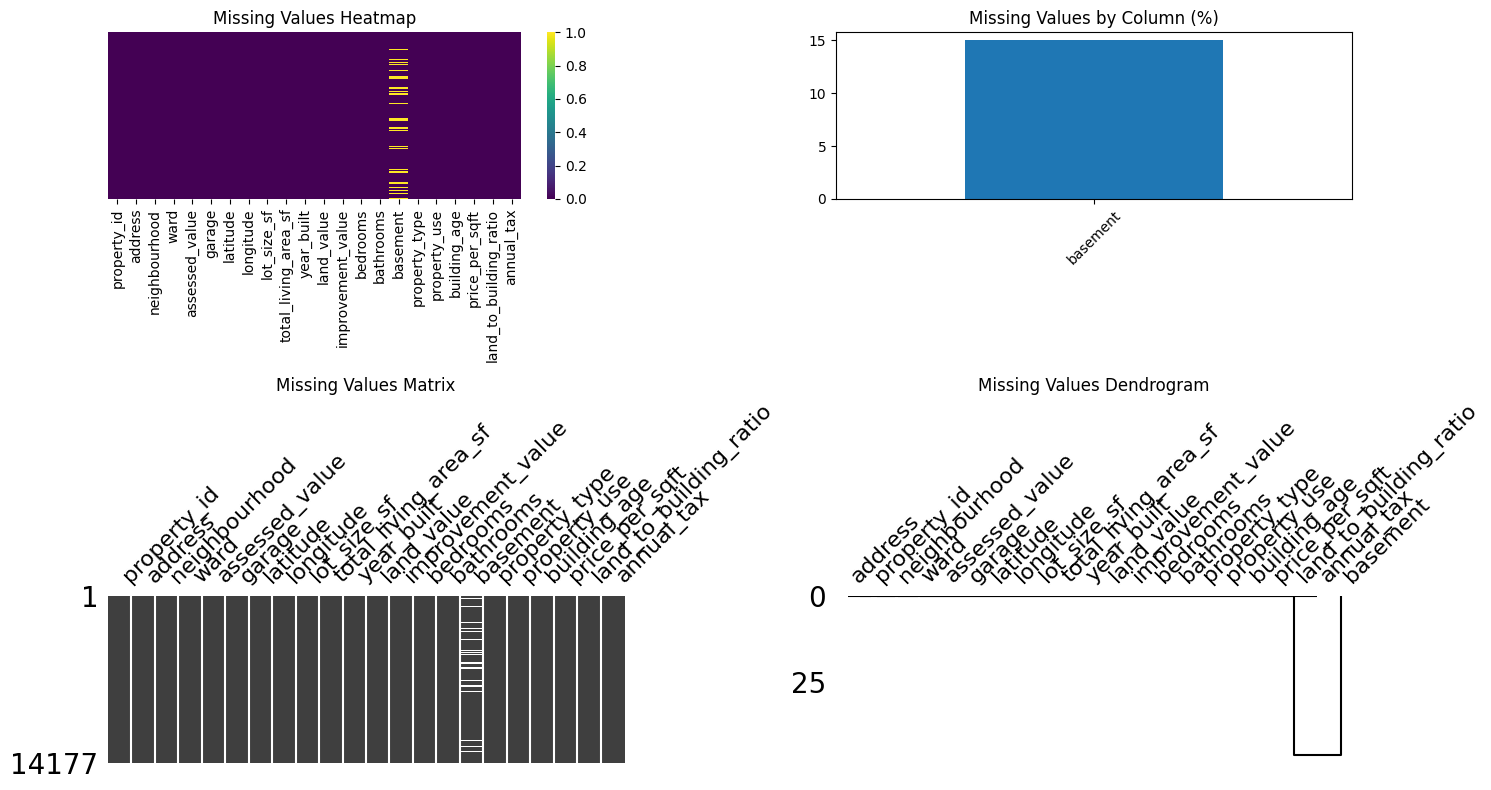

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
# Create missing values heatmap
plt.figure(figsize=(15, 8))
if len(missing_summary) > 0:
    # Missing values heatmap
    plt.subplot(2, 2, 1)
    sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
    plt.title('Missing Values Heatmap')

    # Missing values bar chart
    plt.subplot(2, 2, 2)
    missing_summary['Missing Percentage'].plot(kind='bar')
    plt.title('Missing Values by Column (%)')
    plt.xticks(rotation=45)

    # Missing values matrix using missingno
    plt.subplot(2, 2, 3)
    msno.matrix(df, ax=plt.gca())
    plt.title('Missing Values Matrix')

    # Missing values dendrogram
    plt.subplot(2, 2, 4)
    msno.dendrogram(df, ax=plt.gca())
    plt.title('Missing Values Dendrogram')

else:
    plt.text(0.5, 0.5, 'No Missing Values Found!',
             horizontalalignment='center', verticalalignment='center',
             fontsize=20, transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

In [6]:
def analyze_duplicates(df):
    """Analyze and handle duplicate values"""

    # Check for exact duplicates
    exact_duplicates = df.duplicated().sum()
    print(f"Exact duplicates: {exact_duplicates:,}")

    # Check for duplicates based on property_id
    if 'property_id' in df.columns:
        property_id_dups = df.duplicated(subset=['property_id']).sum()
        print(f"Duplicate property_id: {property_id_dups:,}")

        if property_id_dups > 0:
            print("\nSample duplicate property_ids:")
            dup_properties = df[df.duplicated(subset=['property_id'], keep=False)]['property_id'].value_counts().head()
            print(dup_properties)

    # Check for duplicates based on address
    if 'address' in df.columns:
        address_dups = df.duplicated(subset=['address']).sum()
        print(f"Duplicate addresses: {address_dups:,}")

    # Remove exact duplicates if any
    if exact_duplicates > 0:
        df_clean = df.drop_duplicates()
        print(f"\nRemoved {exact_duplicates:,} exact duplicate rows")
        print(f"Dataset shape after removing duplicates: {df_clean.shape}")
        return df_clean
    else:
        print("\nNo exact duplicates found")
        return df

# Clean duplicates
df_clean = analyze_duplicates(df)

Exact duplicates: 0
Duplicate property_id: 0
Duplicate addresses: 2,329

No exact duplicates found


In [7]:
def statistical_summary(df):
    """Generate comprehensive statistical summary"""

    # Numeric columns summary
    numeric_summary = df[numeric_columns].describe()
    print("NUMERIC COLUMNS SUMMARY:")
    print(numeric_summary.round(2))

    # Key insights for real estate specific columns
    key_columns = ['assessed_value', 'total_living_area_sf', 'lot_size_sf',
                   'year_built', 'bedrooms', 'bathrooms']

    print(f"\nKEY REAL ESTATE METRICS:")
    for col in key_columns:
        if col in df.columns:
            values = df[col].dropna()
            if len(values) > 0:
                print(f"\n{col.upper()}:")
                print(f"   Range: ${values.min():,.0f} - ${values.max():,.0f}" if 'value' in col.lower()
                      else f"   Range: {values.min():.0f} - {values.max():.0f}")
                print(f"   Mean: {values.mean():.1f}")
                print(f"   Median: {values.median():.1f}")
                print(f"   Std Dev: {values.std():.1f}")

statistical_summary(df_clean)

NUMERIC COLUMNS SUMMARY:
       property_id  assessed_value  latitude  longitude  lot_size_sf  \
count     14177.00        14177.00  14177.00   14177.00     14177.00   
mean   10006508.18       347614.73     53.52    -113.51       985.34   
std      131103.35       220080.00      0.07       0.08      1442.81   
min     1001601.00         4000.00     53.42    -113.70         0.14   
25%    10004119.00       177000.00     53.46    -113.55       258.20   
50%    10008448.00       384500.00     53.52    -113.51       395.87   
75%    10012603.00       489000.00     53.58    -113.46       592.70   
max    10016955.00      1085000.00     53.65    -113.33      9000.00   

       total_living_area_sf  year_built  land_value  improvement_value  \
count              14177.00    14177.00    14177.00           14177.00   
mean                 129.26     1997.83   121665.15          225949.57   
std                   94.68       14.35    77028.00          143052.00   
min                   13.60   

In [8]:
import scipy.stats as stats

def detect_outliers(df, columns=None):
    """Detect outliers using multiple methods"""

    if columns is None:
        columns = numeric_columns

    outlier_summary = {}

    for col in columns:
        if col in df.columns:
            values = df[col].dropna()
            if len(values) > 0:
                # IQR method(Interquartile Range)
                Q1 = values.quantile(0.25)
                Q3 = values.quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR

                iqr_outliers = ((values < lower_bound) | (values > upper_bound)).sum()

                # Z-score method
                z_scores = np.abs(stats.zscore(values))
                z_outliers = (z_scores > 3).sum()

                outlier_summary[col] = {
                    'IQR_outliers': iqr_outliers,
                    'Z_score_outliers': z_outliers,
                    'IQR_percentage': (iqr_outliers / len(values)) * 100,
                    'Z_percentage': (z_outliers / len(values)) * 100
                }

                print(f"\n{col}:")
                print(f"   IQR outliers: {iqr_outliers:,} ({iqr_outliers/len(values)*100:.2f}%)")
                print(f"   Z-score outliers: {z_outliers:,} ({z_outliers/len(values)*100:.2f}%)")

    return outlier_summary

outlier_info = detect_outliers(df_clean)


property_id:
   IQR outliers: 3 (0.02%)
   Z-score outliers: 3 (0.02%)

assessed_value:
   IQR outliers: 92 (0.65%)
   Z-score outliers: 54 (0.38%)

latitude:
   IQR outliers: 0 (0.00%)
   Z-score outliers: 0 (0.00%)

longitude:
   IQR outliers: 255 (1.80%)
   Z-score outliers: 0 (0.00%)

lot_size_sf:
   IQR outliers: 2,498 (17.62%)
   Z-score outliers: 332 (2.34%)

total_living_area_sf:
   IQR outliers: 251 (1.77%)
   Z-score outliers: 66 (0.47%)

year_built:
   IQR outliers: 2,965 (20.91%)
   Z-score outliers: 947 (6.68%)

land_value:
   IQR outliers: 92 (0.65%)
   Z-score outliers: 54 (0.38%)

improvement_value:
   IQR outliers: 92 (0.65%)
   Z-score outliers: 54 (0.38%)

bedrooms:
   IQR outliers: 0 (0.00%)
   Z-score outliers: 0 (0.00%)

bathrooms:
   IQR outliers: 0 (0.00%)
   Z-score outliers: 0 (0.00%)

building_age:
   IQR outliers: 2,965 (20.91%)
   Z-score outliers: 947 (6.68%)

price_per_sqft:
   IQR outliers: 152 (1.07%)
   Z-score outliers: 104 (0.73%)

land_to_building_

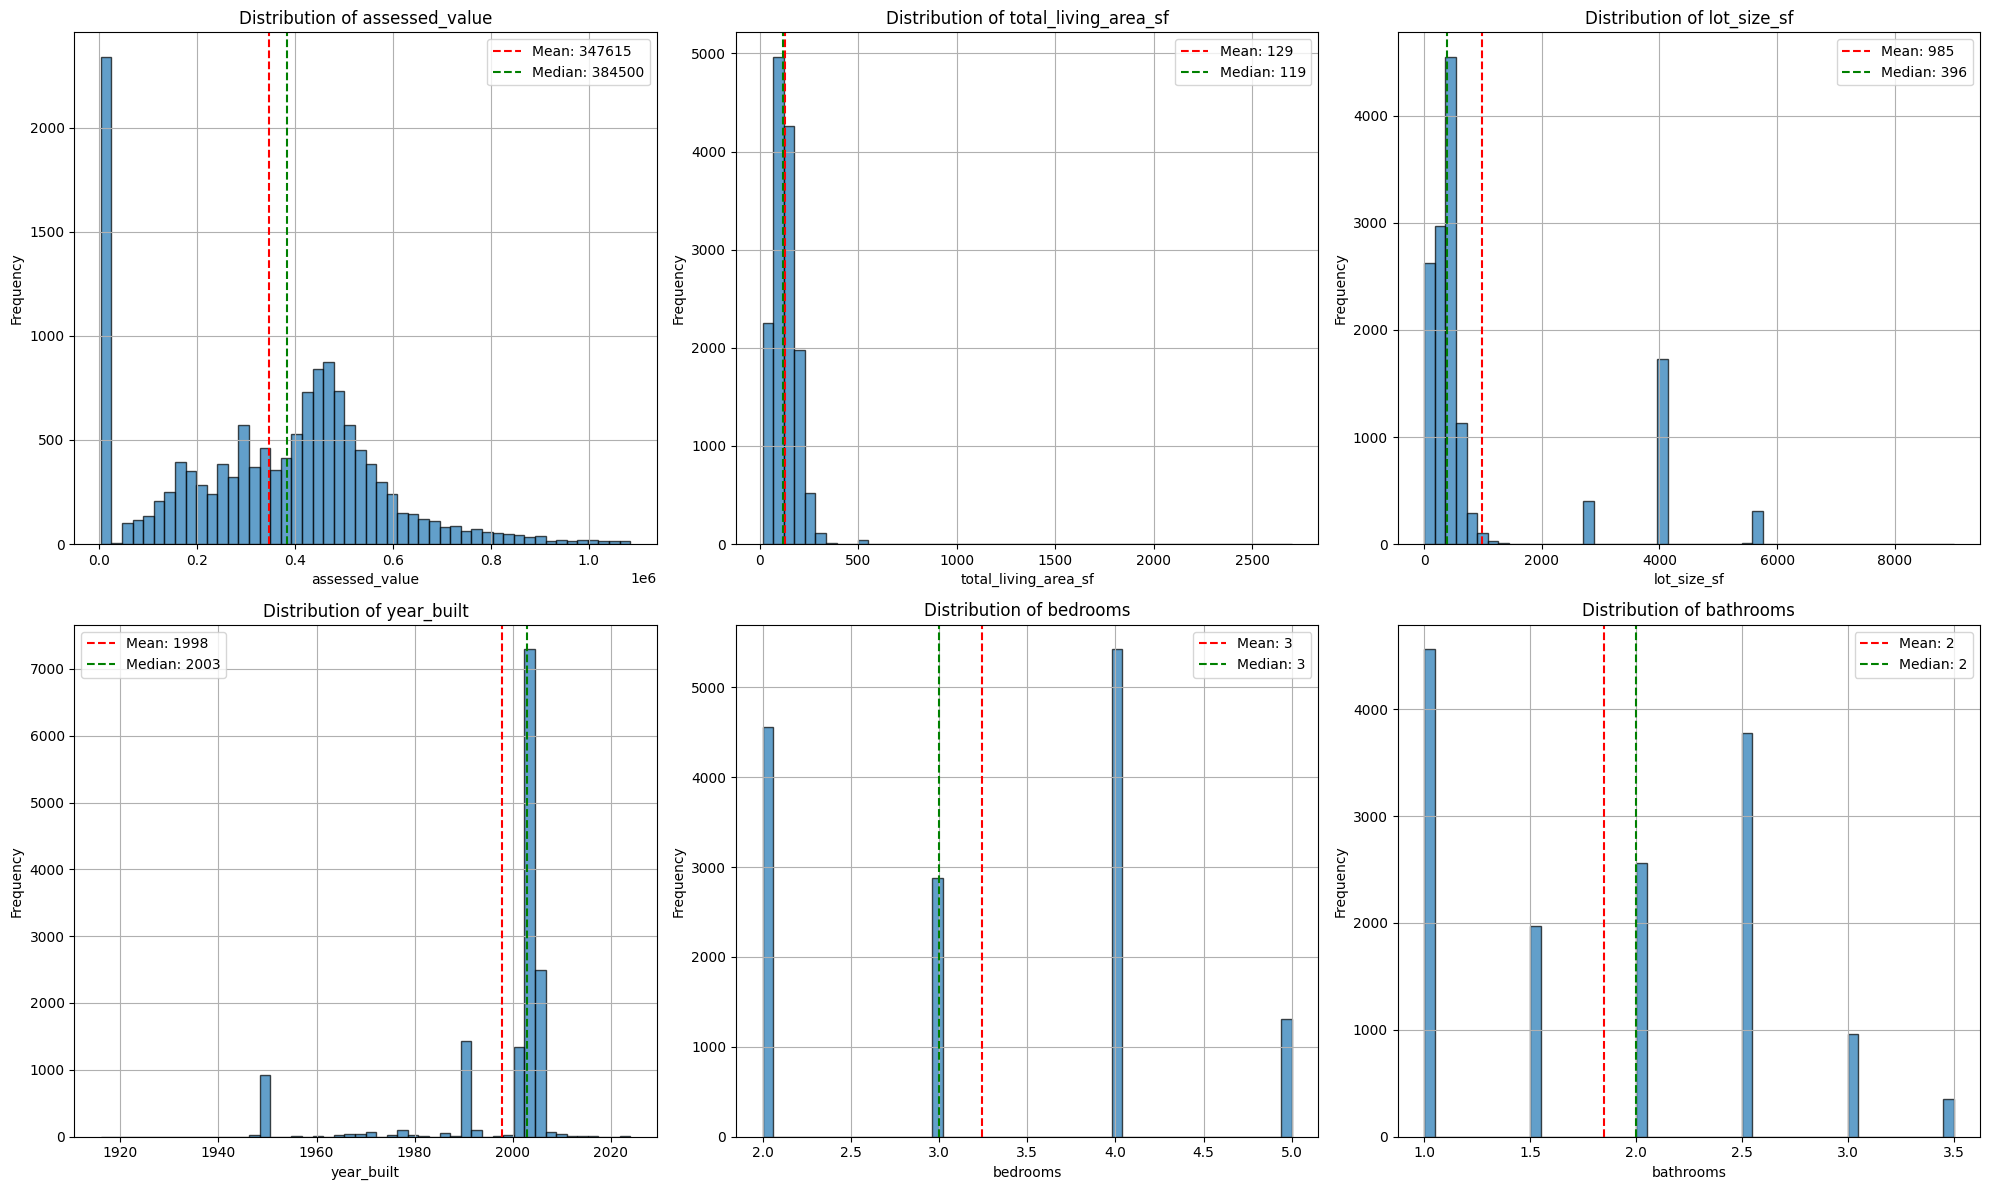

In [9]:
def plot_univariate_analysis(df, columns_to_plot=None):
    """Create comprehensive univariate plots"""

    if columns_to_plot is None:
        # Focus on key real estate columns
        columns_to_plot = ['assessed_value', 'total_living_area_sf', 'lot_size_sf',
                          'year_built', 'bedrooms', 'bathrooms']

    # Filter columns that exist in dataframe
    columns_to_plot = [col for col in columns_to_plot if col in df.columns]

    if len(columns_to_plot) == 0:
        print("No specified columns found in dataset")
        return

    # Create subplots
    n_cols = 3
    n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes

    for i, col in enumerate(columns_to_plot):
        if i < len(axes):
            # Histogram with KDE
            df[col].hist(bins=50, alpha=0.7, ax=axes[i], edgecolor='black')
            axes[i].set_title(f'Distribution of {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')

            # Add statistics text
            mean_val = df[col].mean()
            median_val = df[col].median()
            axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.0f}')
            axes[i].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.0f}')
            axes[i].legend()

    # Hide empty subplots
    for i in range(len(columns_to_plot), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

# Plot univariate analysis
plot_univariate_analysis(df_clean)

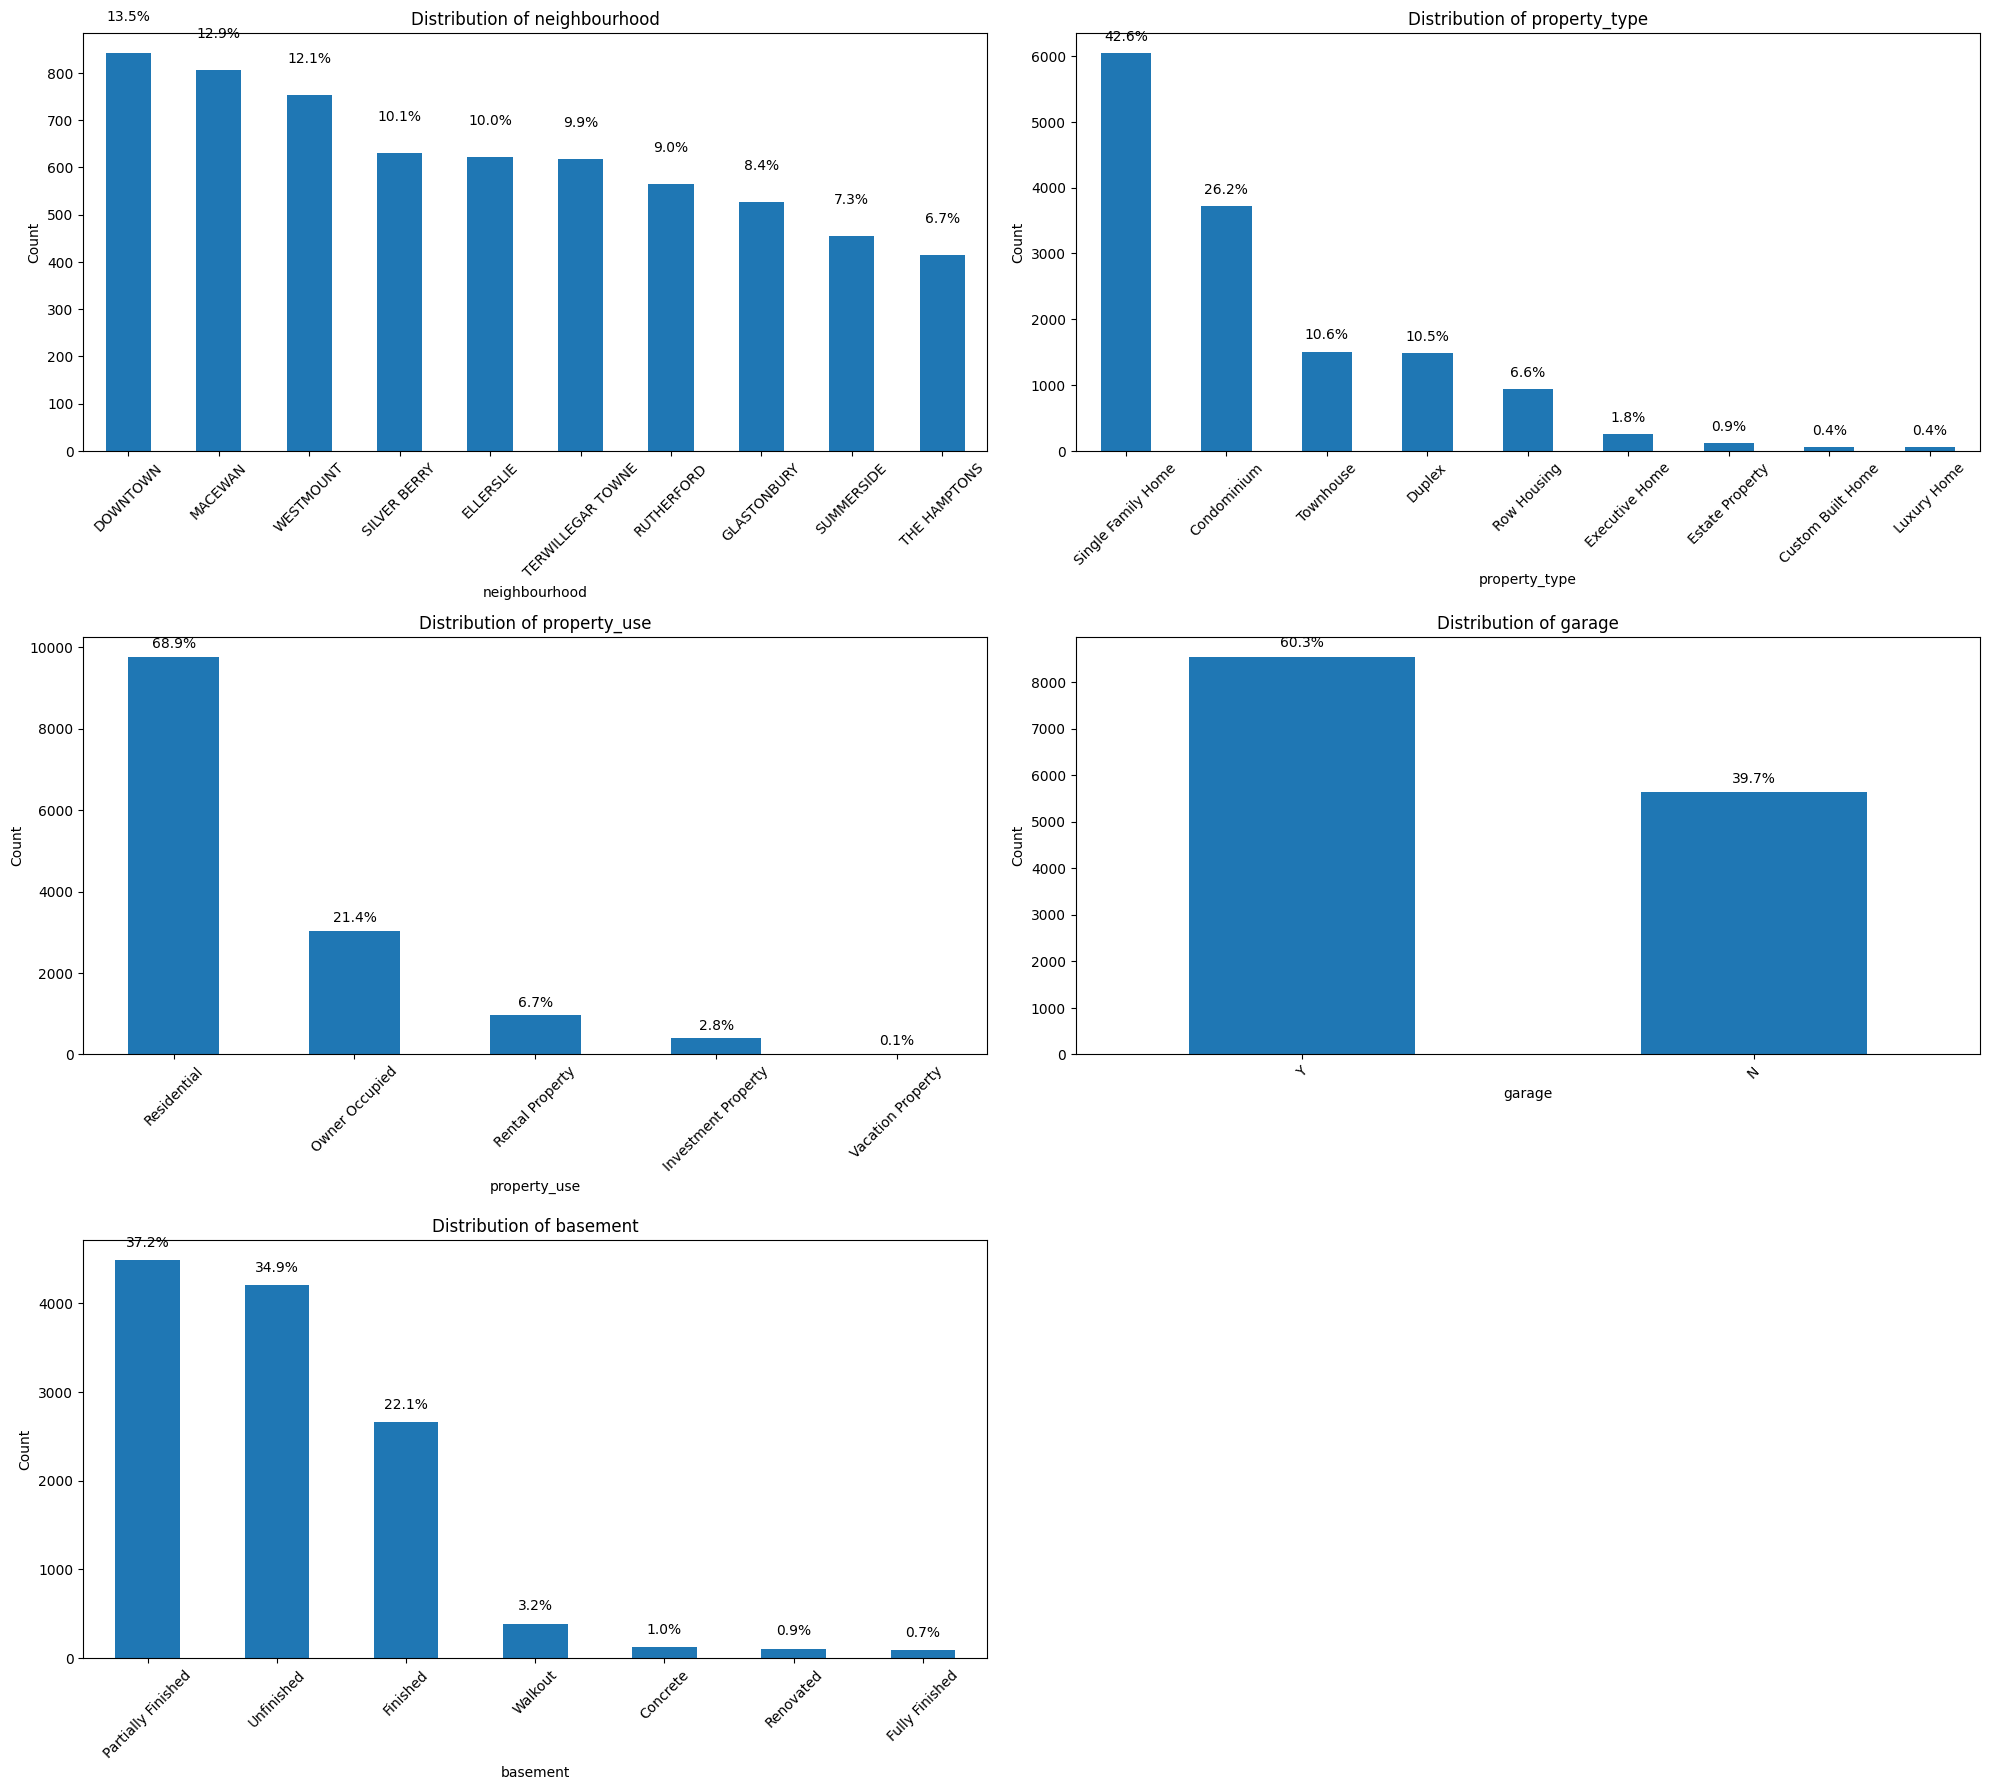


NEIGHBOURHOOD:
   Unique values: 119
   Top 5 values:
      DOWNTOWN: 842 (5.9%)
      MACEWAN: 807 (5.7%)
      WESTMOUNT: 754 (5.3%)
      SILVER BERRY: 631 (4.5%)
      ELLERSLIE: 622 (4.4%)

PROPERTY_TYPE:
   Unique values: 9
   Top 5 values:
      Single Family Home: 6,042 (42.6%)
      Condominium: 3,719 (26.2%)
      Townhouse: 1,508 (10.6%)
      Duplex: 1,491 (10.5%)
      Row Housing: 934 (6.6%)

PROPERTY_USE:
   Unique values: 5
   Top 5 values:
      Residential: 9,767 (68.9%)
      Owner Occupied: 3,034 (21.4%)
      Rental Property: 956 (6.7%)
      Investment Property: 401 (2.8%)
      Vacation Property: 19 (0.1%)

GARAGE:
   Unique values: 2
   Top 5 values:
      Y: 8,542 (60.3%)
      N: 5,635 (39.7%)

BASEMENT:
   Unique values: 7
   Top 5 values:
      Partially Finished: 4,487 (31.6%)
      Unfinished: 4,207 (29.7%)
      Finished: 2,658 (18.7%)
      Walkout: 388 (2.7%)
      Concrete: 118 (0.8%)


In [14]:
def analyze_categorical_variables(df):
    """Analyze categorical variables"""

    # Key categorical columns for real estate
    key_categorical = ['neighbourhood', 'property_type', 'property_use', 'garage', 'basement']
    available_categorical = [col for col in key_categorical if col in df.columns]

    if len(available_categorical) == 0:
        print("No key categorical columns found")
        return

    # Create plots for categorical variables
    n_cols = 2
    n_rows = (len(available_categorical) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6*n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()

    for i, col in enumerate(available_categorical):
        if i < len(axes):
            # Value counts
            value_counts = df[col].value_counts().head(10)  # Top 10 values

            # Bar plot
            value_counts.plot(kind='bar', ax=axes[i])
            axes[i].set_title(f'Distribution of {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Count')
            axes[i].tick_params(axis='x', rotation=45)

            # Add percentage labels
            total = value_counts.sum()
            for j, v in enumerate(value_counts.values):
                axes[i].text(j, v + total*0.01, f'{v/total*100:.1f}%',
                           ha='center', va='bottom')

    # Hide empty subplots
    for i in range(len(available_categorical), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

    # Print detailed categorical analysis
    for col in available_categorical:
        print(f"\n{col.upper()}:")
        value_counts = df[col].value_counts()
        print(f"   Unique values: {len(value_counts)}")
        print(f"   Top 5 values:")
        for val, count in value_counts.head().items():
            print(f"      {val}: {count:,} ({count/len(df)*100:.1f}%)")

analyze_categorical_variables(df_clean)

STRONG CORRELATIONS FOUND:
   land_value ↔ improvement_value: 1.000
   land_value ↔ annual_tax: 1.000
   improvement_value ↔ annual_tax: 1.000
   assessed_value ↔ land_value: 1.000
   year_built ↔ building_age: -1.000
   assessed_value ↔ improvement_value: 1.000
   assessed_value ↔ annual_tax: 1.000
   bedrooms ↔ bathrooms: 0.964
   bathrooms ↔ annual_tax: 0.954
   assessed_value ↔ bathrooms: 0.954
   improvement_value ↔ bathrooms: 0.954
   land_value ↔ bathrooms: 0.954
   land_value ↔ bedrooms: 0.942
   bedrooms ↔ annual_tax: 0.942
   assessed_value ↔ bedrooms: 0.942
   improvement_value ↔ bedrooms: 0.942
   lot_size_sf ↔ land_to_building_ratio: 0.904


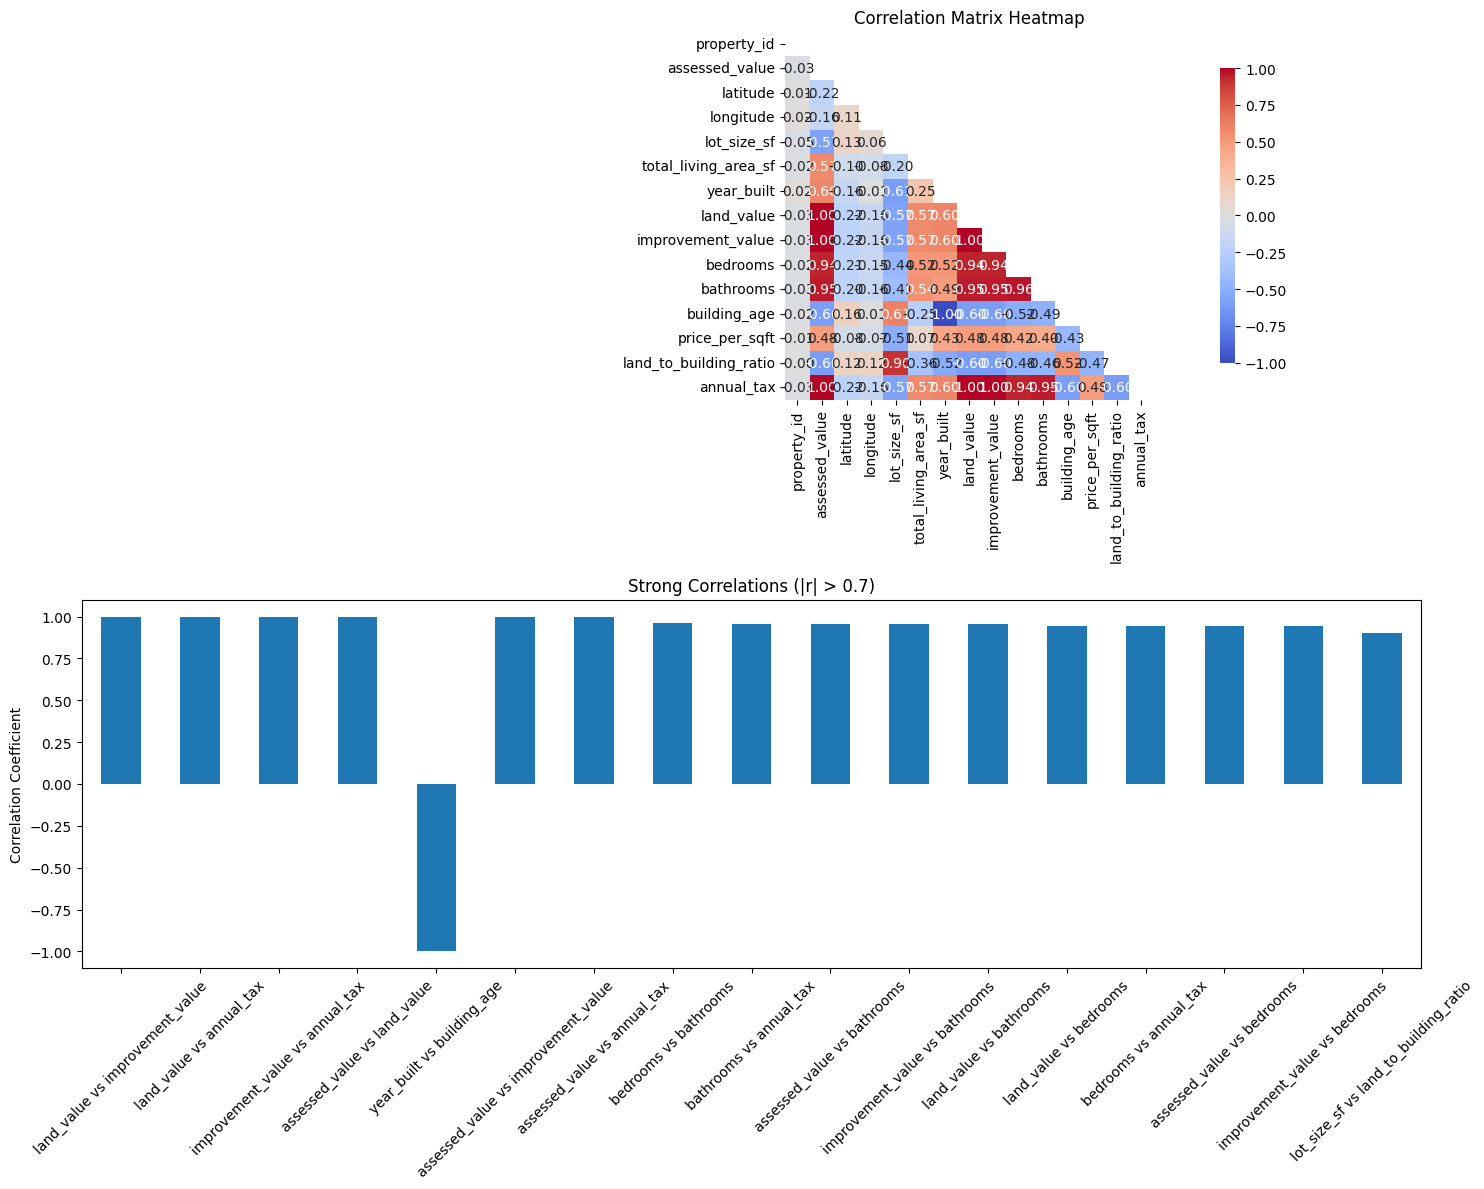

In [15]:
def correlation_analysis(df):
    """Perform correlation analysis"""

    # Select numeric columns for correlation
    numeric_df = df[numeric_columns].select_dtypes(include=[np.number])

    # Calculate correlation matrix
    correlation_matrix = numeric_df.corr()

    # Create correlation heatmap
    plt.figure(figsize=(15, 12))

    # Heatmap
    plt.subplot(2, 1, 1)
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, mask=mask, fmt='.2f', cbar_kws={'shrink': 0.8})
    plt.title('Correlation Matrix Heatmap')

    # Strong correlations
    plt.subplot(2, 1, 2)
    # Find strong correlations (> 0.7 or < -0.7)
    strong_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.7:
                strong_corr.append({
                    'var1': correlation_matrix.columns[i],
                    'var2': correlation_matrix.columns[j],
                    'correlation': corr_val
                })

    if strong_corr:
        strong_corr_df = pd.DataFrame(strong_corr).sort_values('correlation', key=abs, ascending=False)
        strong_corr_df['correlation'].plot(kind='bar')
        plt.title('Strong Correlations (|r| > 0.7)')
        plt.xticks(range(len(strong_corr_df)),
                   [f"{row['var1']} vs {row['var2']}" for _, row in strong_corr_df.iterrows()],
                   rotation=45)
        plt.ylabel('Correlation Coefficient')

        print("STRONG CORRELATIONS FOUND:")
        for _, row in strong_corr_df.iterrows():
            print(f"   {row['var1']} ↔ {row['var2']}: {row['correlation']:.3f}")
    else:
        plt.text(0.5, 0.5, 'No Strong Correlations Found\n(|r| > 0.7)',
                horizontalalignment='center', verticalalignment='center',
                transform=plt.gca().transAxes, fontsize=16)
        plt.title('Strong Correlations')

    plt.tight_layout()
    plt.show()

    return correlation_matrix

correlation_matrix = correlation_analysis(df_clean)

TOP 10 NEIGHBORHOODS BY AVERAGE ASSESSED VALUE:
                   assessed_value_count  assessed_value_mean  \
neighbourhood                                                  
BELGRAVIA                            30            940200.00   
DONSDALE                             79            849810.13   
RIVER'S EDGE                          3            769666.67   
BLACKMUD CREEK                      102            757598.04   
POTTER GREENS                        33            635515.15   
CAMERON HEIGHTS                     110            632236.36   
ALLENDALE                             2            591000.00   
LAURIER HEIGHTS                       1            585000.00   
HODGSON                             310            581598.39   
SOUTH TERWILLEGAR                    57            577114.04   

                   assessed_value_median  assessed_value_std  \
neighbourhood                                                  
BELGRAVIA                       924750.0            922

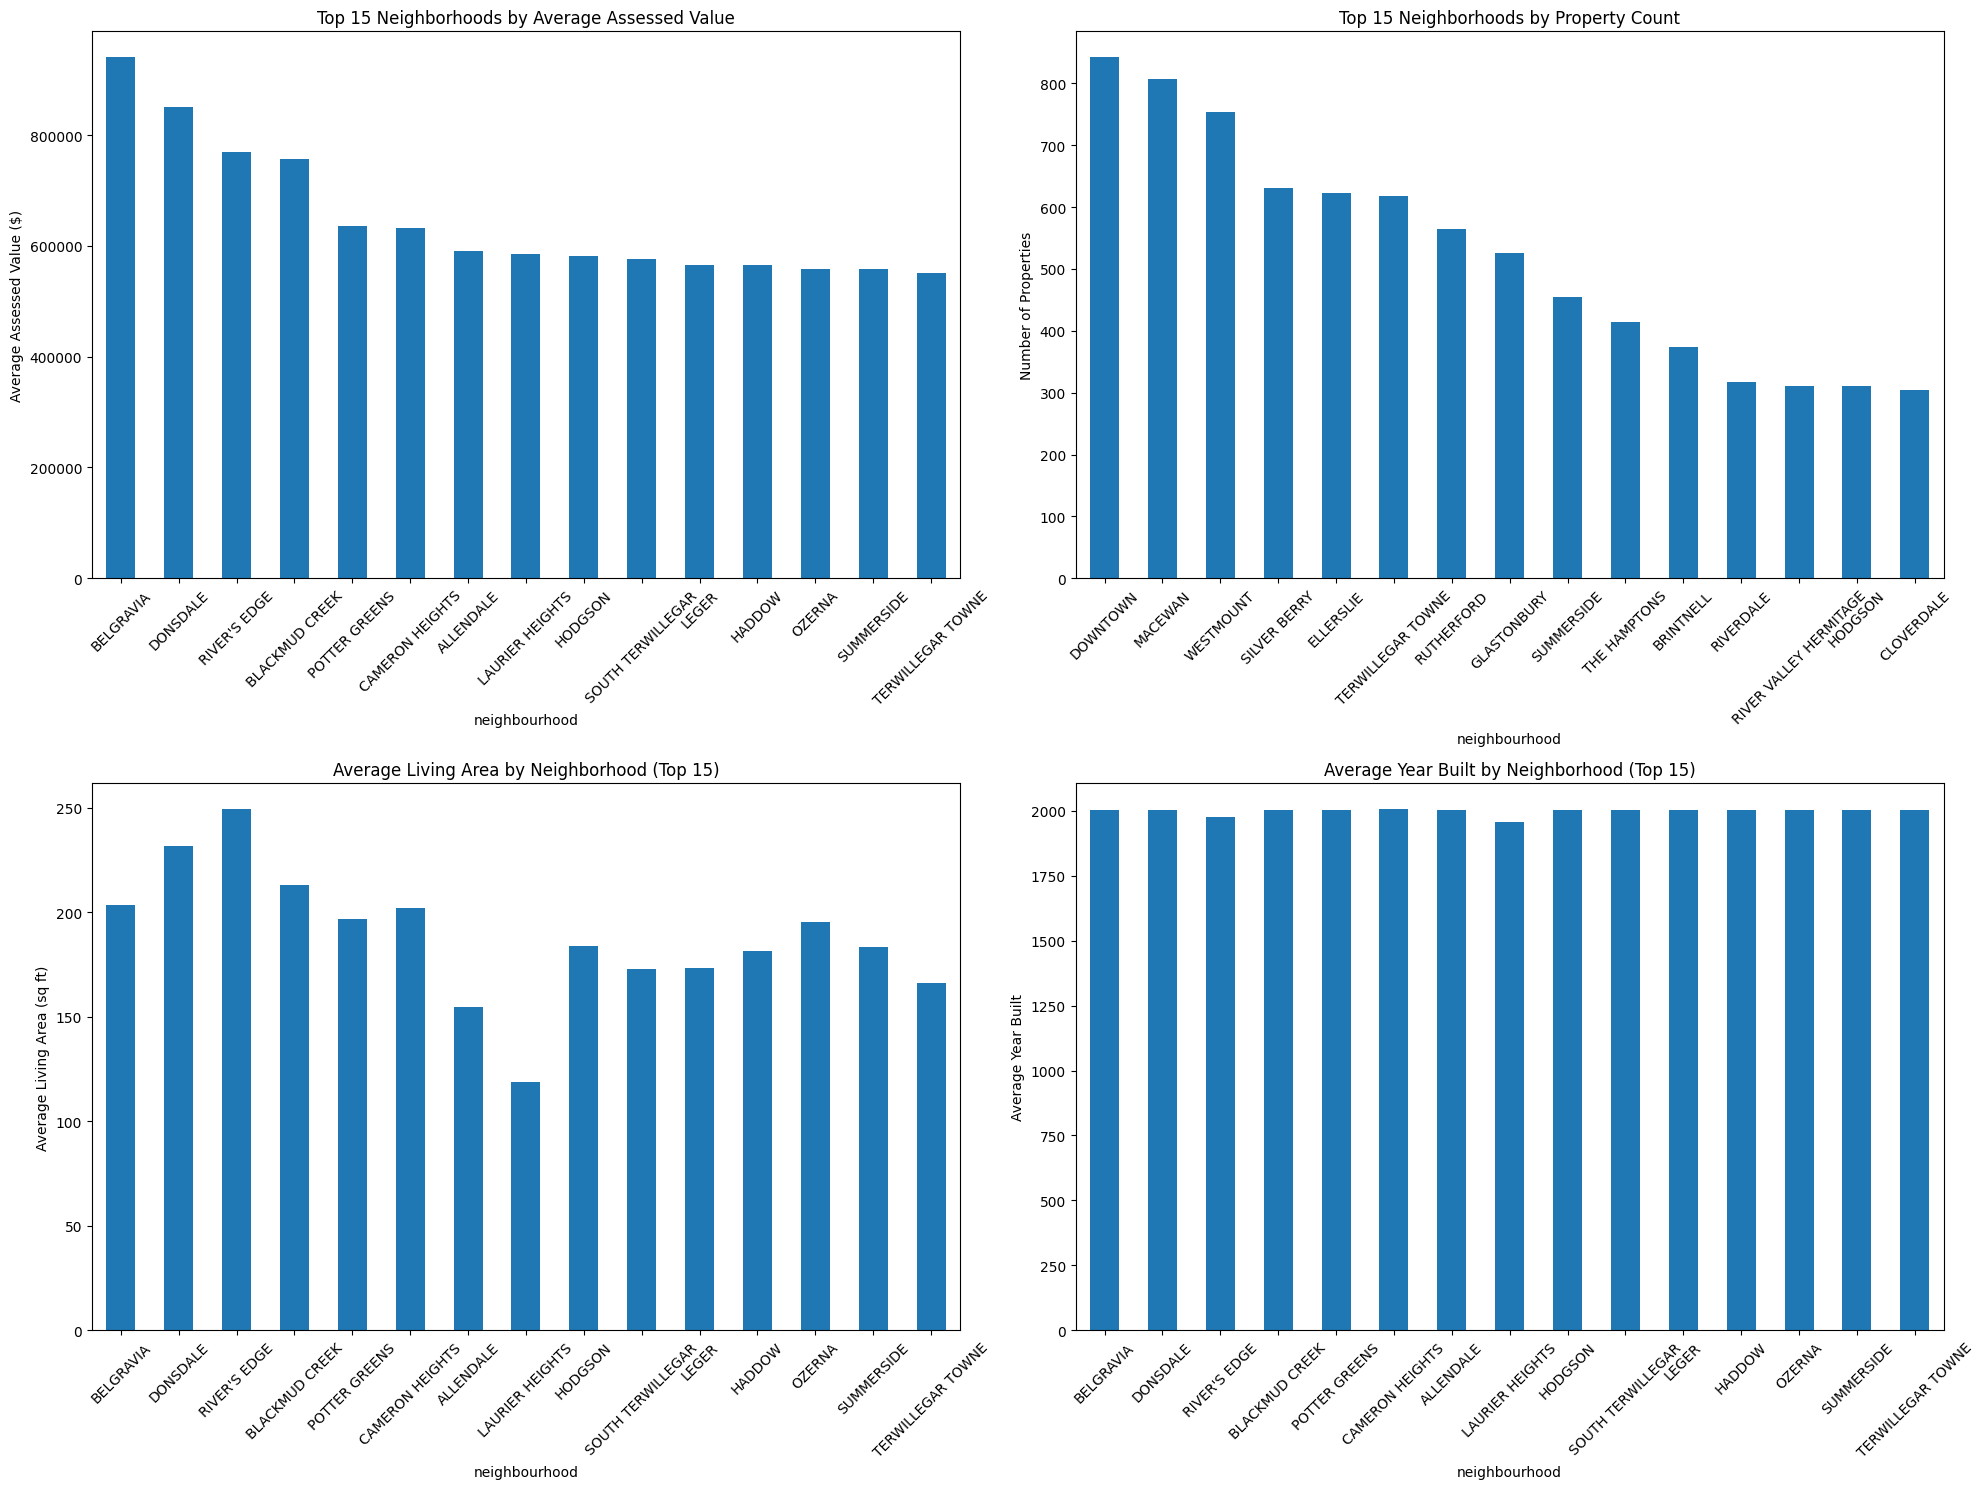

In [16]:
def neighborhood_analysis(df):
    """Analyze properties by neighborhood"""

    if 'neighbourhood' not in df.columns:
        print("Neighbourhood column not found")
        return

    # Neighborhood statistics
    neighborhood_stats = df.groupby('neighbourhood').agg({
        'assessed_value': ['count', 'mean', 'median', 'std'],
        'total_living_area_sf': 'mean',
        'lot_size_sf': 'mean',
        'year_built': 'mean'
    }).round(2)

    # Flatten column names
    neighborhood_stats.columns = ['_'.join(col).strip() for col in neighborhood_stats.columns]
    neighborhood_stats = neighborhood_stats.sort_values('assessed_value_mean', ascending=False)

    print("TOP 10 NEIGHBORHOODS BY AVERAGE ASSESSED VALUE:")
    print(neighborhood_stats.head(10))

    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))

    # Top neighborhoods by average assessed value
    top_neighborhoods = neighborhood_stats.head(15)
    top_neighborhoods['assessed_value_mean'].plot(kind='bar', ax=axes[0,0])
    axes[0,0].set_title('Top 15 Neighborhoods by Average Assessed Value')
    axes[0,0].set_ylabel('Average Assessed Value ($)')
    axes[0,0].tick_params(axis='x', rotation=45)

    # Property count by neighborhood
    property_counts = df['neighbourhood'].value_counts().head(15)
    property_counts.plot(kind='bar', ax=axes[0,1])
    axes[0,1].set_title('Top 15 Neighborhoods by Property Count')
    axes[0,1].set_ylabel('Number of Properties')
    axes[0,1].tick_params(axis='x', rotation=45)

    # Average living area by neighborhood
    top_neighborhoods['total_living_area_sf_mean'].plot(kind='bar', ax=axes[1,0])
    axes[1,0].set_title('Average Living Area by Neighborhood (Top 15)')
    axes[1,0].set_ylabel('Average Living Area (sq ft)')
    axes[1,0].tick_params(axis='x', rotation=45)

    # Average year built by neighborhood
    top_neighborhoods['year_built_mean'].plot(kind='bar', ax=axes[1,1])
    axes[1,1].set_title('Average Year Built by Neighborhood (Top 15)')
    axes[1,1].set_ylabel('Average Year Built')
    axes[1,1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    return neighborhood_stats

neighborhood_stats = neighborhood_analysis(df_clean)

PROPERTY VALUE DISTRIBUTION:
   350K-500K: 4,441 properties (31.3%)
   <200K: 3,911 properties (27.6%)
   500K-750K: 2,708 properties (19.1%)
   200K-350K: 2,622 properties (18.5%)
   750K-1M: 435 properties (3.1%)
   >1M: 60 properties (0.4%)


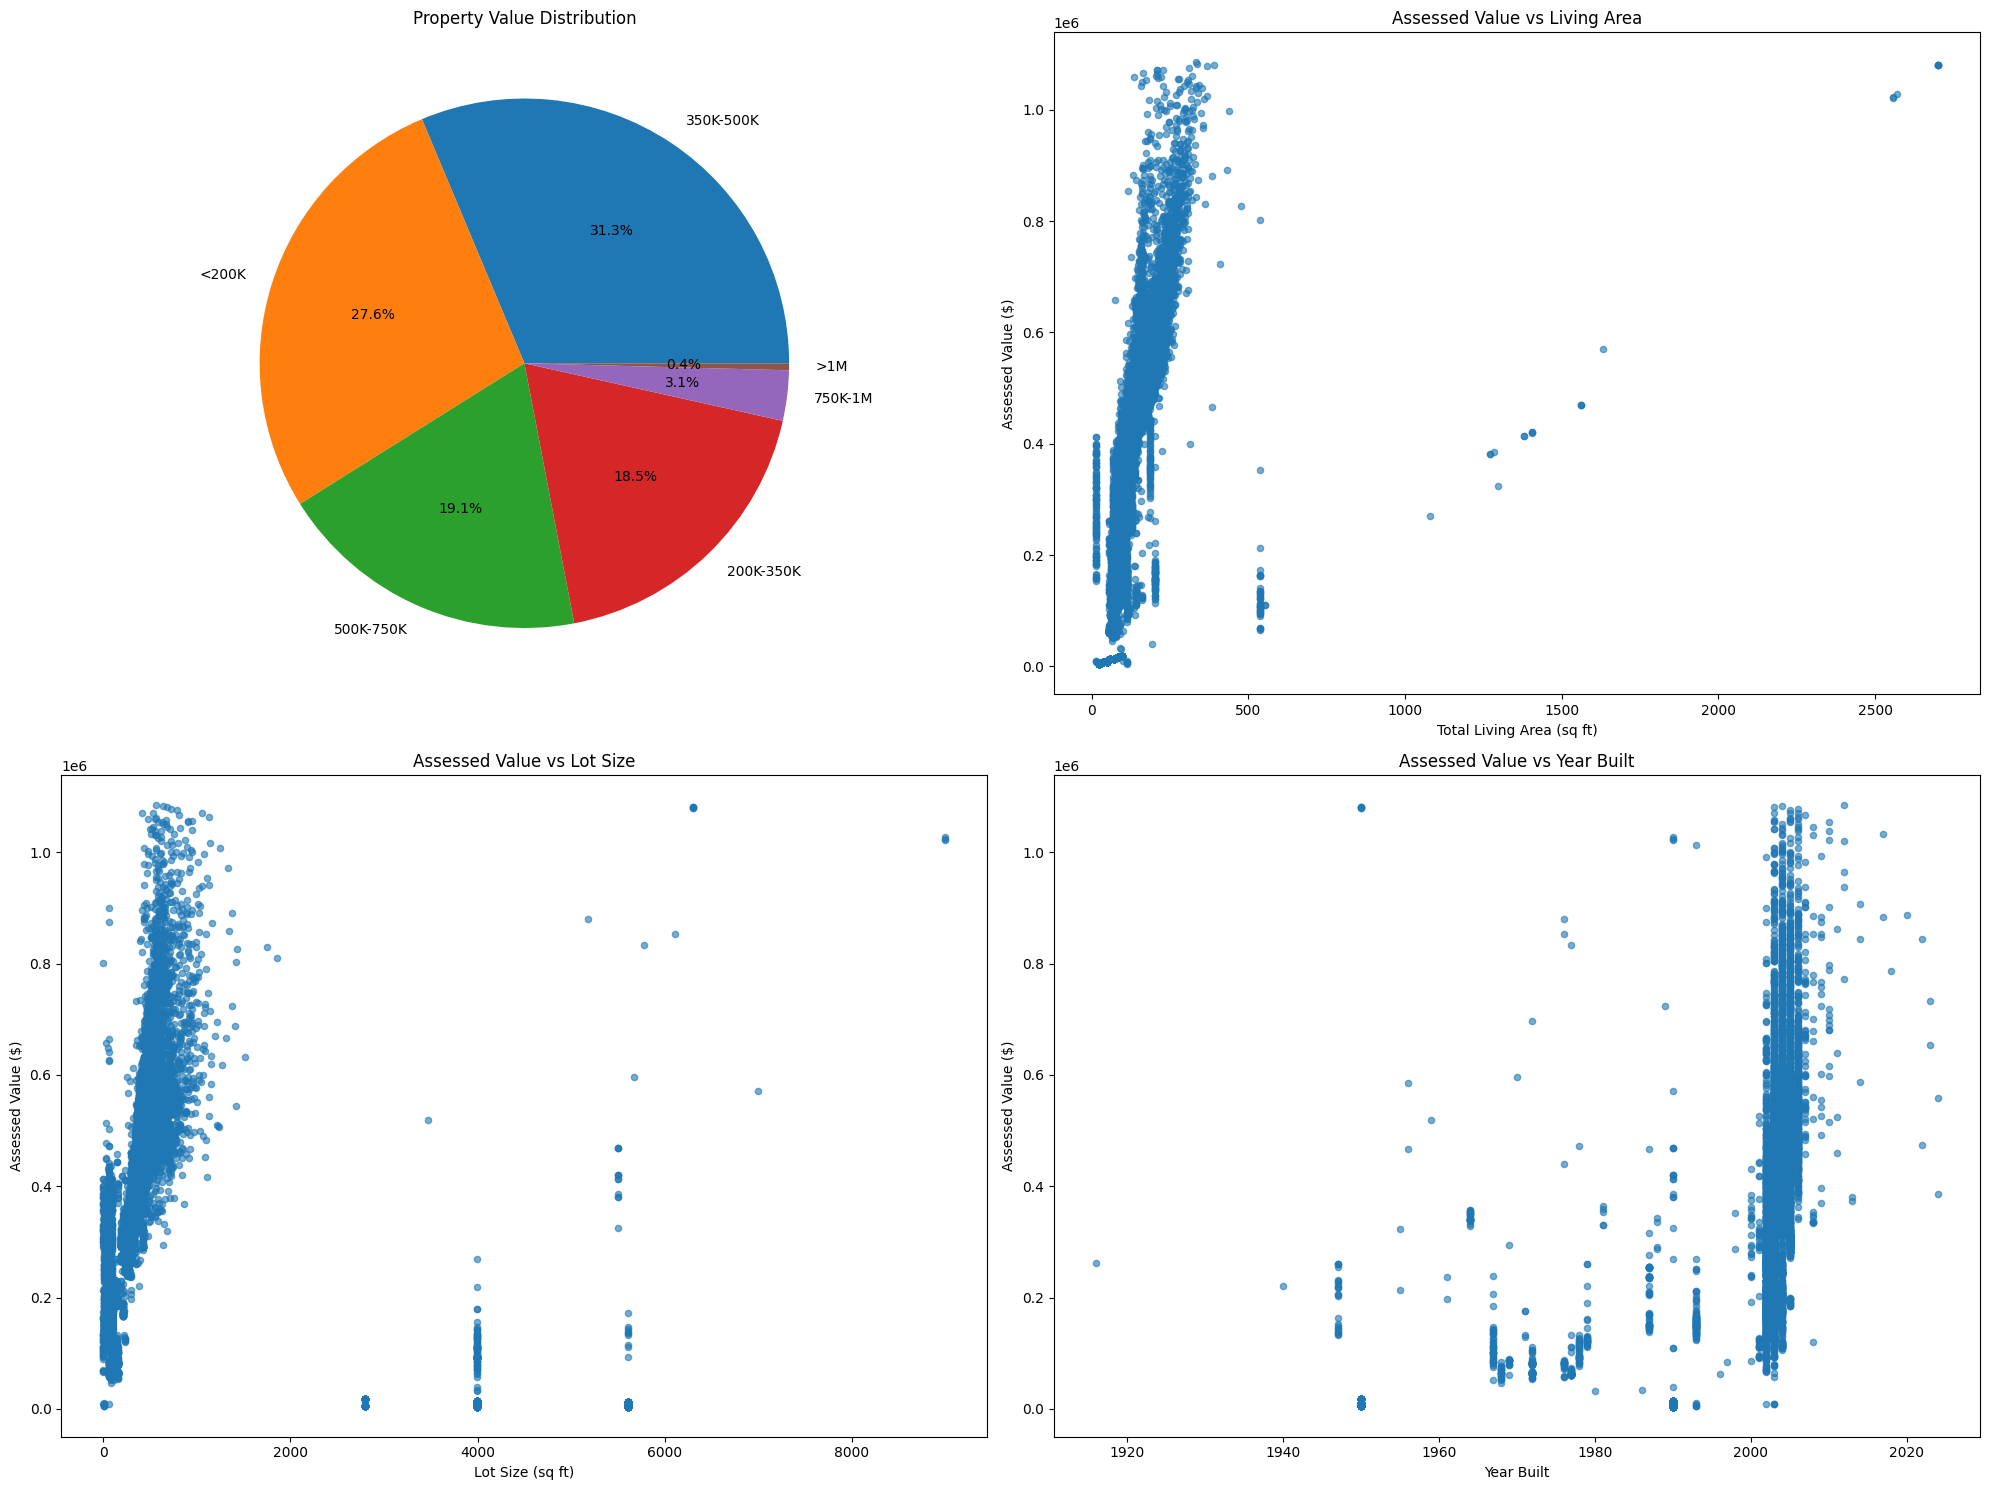

In [17]:
def property_value_analysis(df):
    """Analyze property values and related factors"""

    # Price ranges
    if 'assessed_value' in df.columns:
        df['price_range'] = pd.cut(df['assessed_value'],
                                  bins=[0, 200000, 350000, 500000, 750000, 1000000, float('inf')],
                                  labels=['<200K', '200K-350K', '350K-500K', '500K-750K', '750K-1M', '>1M'])

        # Price range distribution
        price_dist = df['price_range'].value_counts()
        print("PROPERTY VALUE DISTRIBUTION:")
        for range_val, count in price_dist.items():
            print(f"   {range_val}: {count:,} properties ({count/len(df)*100:.1f}%)")

        # Visualizations
        fig, axes = plt.subplots(2, 2, figsize=(20, 15))

        # Price range distribution
        price_dist.plot(kind='pie', ax=axes[0,0], autopct='%1.1f%%')
        axes[0,0].set_title('Property Value Distribution')
        axes[0,0].set_ylabel('')

        # Assessed value vs living area
        if 'total_living_area_sf' in df.columns:
            df.plot.scatter(x='total_living_area_sf', y='assessed_value',
                           alpha=0.6, ax=axes[0,1])
            axes[0,1].set_title('Assessed Value vs Living Area')
            axes[0,1].set_xlabel('Total Living Area (sq ft)')
            axes[0,1].set_ylabel('Assessed Value ($)')

        # Assessed value vs lot size
        if 'lot_size_sf' in df.columns:
            df.plot.scatter(x='lot_size_sf', y='assessed_value',
                           alpha=0.6, ax=axes[1,0])
            axes[1,0].set_title('Assessed Value vs Lot Size')
            axes[1,0].set_xlabel('Lot Size (sq ft)')
            axes[1,0].set_ylabel('Assessed Value ($)')

        # Assessed value vs year built
        if 'year_built' in df.columns:
            df.plot.scatter(x='year_built', y='assessed_value',
                           alpha=0.6, ax=axes[1,1])
            axes[1,1].set_title('Assessed Value vs Year Built')
            axes[1,1].set_xlabel('Year Built')
            axes[1,1].set_ylabel('Assessed Value ($)')

        plt.tight_layout()
        plt.show()

property_value_analysis(df_clean)

In [23]:
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder, StandardScaler

def preprocess_for_ml(df):
    """Prepare data for machine learning"""

    # Create a copy for processing
    df_ml = df.copy()

    # Handle missing values
    print("Handling missing values...")

    # Fill numeric missing values with median
    numeric_cols = df_ml.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if df_ml[col].isnull().any():
            median_val = df_ml[col].median()
            df_ml[col].fillna(median_val, inplace=True)
            print(f"   Filled {col} missing values with median: {median_val}")

    # Fill categorical missing values with mode
    categorical_cols = df_ml.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if df_ml[col].isnull().any():
            mode_val = df_ml[col].mode()[0] if len(df_ml[col].mode()) > 0 else 'Unknown'
            df_ml[col].fillna(mode_val, inplace=True)
            print(f"   Filled {col} missing values with mode: {mode_val}")

    # Encode categorical variables
    print("\nEncoding categorical variables...")
    label_encoders = {}

    for col in categorical_cols:
        if col not in ['property_id', 'address']:  # Keep ID and address as is
            le = LabelEncoder()
            df_ml[f'{col}_encoded'] = le.fit_transform(df_ml[col].astype(str))
            label_encoders[col] = le
            print(f"   Encoded {col} -> {col}_encoded")

    # Create feature matrix (X) and target variable (y)
    # Assuming assessed_value is our target
    if 'assessed_value' in df_ml.columns:
        # Features (exclude target and non-predictive columns like property_id, address, is_estimated, price_range, and original categorical columns)
        exclude_cols = ['assessed_value', 'property_id', 'address', 'is_estimated', 'price_range'] + list(categorical_cols)
        feature_cols = [col for col in df_ml.columns if col not in exclude_cols]

        X = df_ml[feature_cols]
        y = df_ml['assessed_value']

        print(f"\nFeature matrix shape: {X.shape}")
        print(f"Target variable shape: {y.shape}")
        print(f"Features: {feature_cols}")
        print("\nFirst few rows of features (X) before scaling:")
        display(X.head())

        # Scale features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        X_scaled_df = pd.DataFrame(X_scaled, columns=feature_cols)

        print("\nData preprocessing completed!")

        return df_ml, X_scaled_df, y, scaler, label_encoders

    else:
        print("Target variable 'assessed_value' not found")
        return df_ml, None, None, None, label_encoders

# Preprocess data
df_processed, X_scaled, y, scaler, encoders = preprocess_for_ml(df_clean)

Handling missing values...
   Filled basement missing values with mode: Partially Finished

Encoding categorical variables...
   Encoded neighbourhood -> neighbourhood_encoded
   Encoded ward -> ward_encoded
   Encoded garage -> garage_encoded
   Encoded basement -> basement_encoded
   Encoded property_type -> property_type_encoded
   Encoded property_use -> property_use_encoded

Feature matrix shape: (14177, 19)
Target variable shape: (14177,)
Features: ['latitude', 'longitude', 'lot_size_sf', 'total_living_area_sf', 'year_built', 'land_value', 'improvement_value', 'bedrooms', 'bathrooms', 'building_age', 'price_per_sqft', 'land_to_building_ratio', 'annual_tax', 'neighbourhood_encoded', 'ward_encoded', 'garage_encoded', 'basement_encoded', 'property_type_encoded', 'property_use_encoded']

First few rows of features (X) before scaling:


,latitude,longitude,lot_size_sf,total_living_area_sf,year_built,land_value,improvement_value,bedrooms,bathrooms,building_age,price_per_sqft,land_to_building_ratio,annual_tax,neighbourhood_encoded,ward_encoded,garage_encoded,basement_encoded,property_type_encoded,property_use_encoded
0,53.644496,-113.510582,395.758,137.0,2003,149975,278525,4,2.0,22,3127.737226,2.888745,5142,28,11,1,1,2,2
1,53.644589,-113.510570,364.863,136.9,2003,153475,285025,4,2.0,22,3203.067933,2.665179,5262,28,11,1,3,7,3
2,53.644682,-113.510559,364.866,151.4,2003,153650,285350,4,2.0,22,2899.603699,2.409947,5268,28,11,1,1,6,0
3,53.644785,-113.510550,424.504,136.8,2003,154000,286000,4,2.0,22,3216.374269,3.103099,5280,28,11,1,5,7,3
4,53.644628,-113.508435,551.298,133.3,2003,170625,316875,4,2.5,22,3657.164291,4.135769,5850,28,11,1,3,7,2



Data preprocessing completed!


In [27]:
from datetime import datetime

def generate_final_summary(df_original, df_processed):
    """Generate final analysis summary and recommendations"""

    print(f"DATA OVERVIEW:")
    print(f"   Original dataset: {df_original.shape[0]:,} rows × {df_original.shape[1]} columns")
    print(f"   Processed dataset: {df_processed.shape[0]:,} rows × {df_processed.shape[1]} columns")
    print(f"   Data quality: {((df_processed.notnull().sum().sum()) / (df_processed.shape[0] * df_processed.shape[1]) * 100):.1f}% complete")

    print(f"\nKEY INSIGHTS:")
    if 'assessed_value' in df_processed.columns:
        avg_value = df_processed['assessed_value'].mean()
        median_value = df_processed['assessed_value'].median()
        print(f"   Average property value: ${avg_value:,.0f}")
        print(f"   Median property value: ${median_value:,.0f}")

    if 'neighbourhood' in df_processed.columns:
        total_neighborhoods = df_processed['neighbourhood'].nunique()
        print(f"   Total neighborhoods: {total_neighborhoods}")

    if 'property_type' in df_processed.columns:
        most_common_type = df_processed['property_type'].mode()[0]
        print(f"   Most common property type: {most_common_type}")

    print(f"\nNEXT STEPS:")
    print(f"   1. Feature Engineering: Create additional features like price per sq ft ratios")
    print(f"   2. Outlier Treatment: Consider removing or transforming extreme outliers")
    print(f"   3. Machine Learning: Data is ready for predictive modeling")
    print(f"   4. Geographic Analysis: Leverage lat/long for spatial analysis")
    print(f"   5. Time Series: Analyze trends if historical data is available")

    print(f"Analysis completed on: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

generate_final_summary(df, df_processed)

DATA OVERVIEW:
   Original dataset: 14,177 rows × 23 columns
   Processed dataset: 14,177 rows × 29 columns
   Data quality: 100.0% complete

KEY INSIGHTS:
   Average property value: $347,615
   Median property value: $384,500
   Total neighborhoods: 119
   Most common property type: Single Family Home

NEXT STEPS:
   1. Feature Engineering: Create additional features like price per sq ft ratios
   2. Outlier Treatment: Consider removing or transforming extreme outliers
   3. Machine Learning: Data is ready for predictive modeling
   4. Geographic Analysis: Leverage lat/long for spatial analysis
   5. Time Series: Analyze trends if historical data is available
Analysis completed on: 2025-06-30 05:46:12
